___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Victor Arruda Niubó

#### Giovanni Pertence Cardoso dos Santos

#### Gustavo Schlieper Tessitore

#### Leonardo Cesari Costa
___

# Previsão da quantidade de views

___

## 1. INTRODUÇÃO

O objetivo do projeto é estimar a quantidade de visualizações que um vídeo terá com base no título, horário de publicação e as tags atribuidas aos vídeos.

___
## 2. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import itertools
import math
import json
import os
from scipy import stats
from scipy.stats import norm

In [33]:
#remove mesagens de aviso do Pandas
pd.options.mode.chained_assignment = None
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/giovannid.santos/Documents/Insper/3_Semestre/CDADOS-DP/cdados_dp/P3


### BASE DE DADOS

In [34]:
# Base de dados dos videos em destaque do youtube US
you_data = pd.read_csv("USvideos.csv")

you_data.drop_duplicates(subset = 'video_id', keep = 'last', inplace = True)

# jason que contém a relação id - categoria
ids = json.loads(open('US_category_id.json').read())


# filtro das variáveis de interesse
you_analysis = you_data.loc[you_data.views|you_data.title|you_data.tags|you_data.category_id,\
                           ['views', 'title', 'tags', 'category_id']]


In [35]:
# separação da string das tags em uma lista de strings
tags_split = you_analysis.tags.str.split(pat = '|')
you_analysis['tags_split'] = tags_split
you_analysis.head()
you_ifn = you_analysis.copy()

In [36]:
# Junta todas as strings em uma lista só para pder fazer um value_counts() e criar um
# dataframe com as tags e as frquencias de cada uma
merged = list(itertools.chain(*you_analysis.tags_split))
contador = pd.DataFrame({'col':merged})
limpino = contador[contador.col != '[none]']
dfl = limpino.col.value_counts().rename_axis('tags').reset_index(name='counts')
dfl = dfl[(dfl['counts'])> 10]

In [114]:
dfl.head(7)

,tags,counts
0,funny,631
1,comedy,515
2,humor,277
3,comedian,227
4,music,213
5,celebrities,212
6,interview,203


In [38]:
# Separa as linhas que contém certa tag

for e in range(len(dfl.tags)):
    var_df = you_analysis[you_analysis['tags'].str.contains(dfl.tags[e])]
    x = list(var_df.index)
    you_analysis[dfl.tags[e]+'_freq'] = 0
    you_analysis.loc[x,[dfl.tags[e]+'_freq']] = dfl.counts[e]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


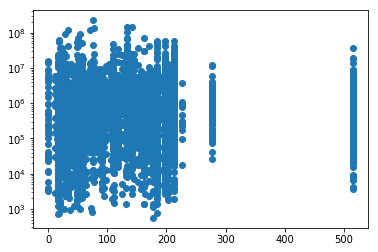

In [118]:
# Cria dataframe das views e frequência máxima
banana = pd.DataFrame()
banana['views'] = you_analysis['views']
banana['max_freq'] = you_analysis.iloc[:,5:].max(axis=1)

# Plota scatter 
ax = plt.gca()
ax.scatter(banana.max_freq, banana.views)
ax.set_yscale('log')

In [67]:
# Transpose no dataframe para poder usar .nlargest()
trans = you_analysis.iloc[:,5:].transpose()

In [115]:
#trans.rename(index=str, columns={e: "vid_{0}".format(e)})
trans.head(7)

,10,36,41,55,76,78,102,104,106,117,...,40939,40940,40941,40942,40943,40944,40945,40946,40947,40948
funny_freq,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
comedy_freq,0,0,0,0,0,0,515,0,0,0,...,0,0,0,0,0,0,0,0,515,0
humor_freq,0,0,0,0,0,277,277,0,0,0,...,0,0,0,0,0,0,0,0,0,0
comedian_freq,0,0,0,0,0,227,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
music_freq,0,0,0,0,0,0,0,0,0,0,...,0,0,213,0,213,0,0,0,0,0
celebrities_freq,0,0,0,0,0,212,0,0,0,0,...,0,0,0,0,212,0,0,0,0,0
interview_freq,0,0,0,0,0,0,0,0,0,203,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Cria dicionário com chave de index e valor com top 3 frequências
ind = list(you_analysis.iloc[:,5:].index)
dic = {}
for e in ind:
    dic[e]= trans.nlargest(3,e)[e].sum()


,views,title,tags,category_id,tags_split,top freq
10,81377,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL|Football|offense|defense|afc|nfc|American ...,17,"[NFL, Football, offense, defense, afc, nfc, Am...",10
36,288922,TL;DW - Every DCEU Movie Before Justice League,screenjunkies|screen junkies|sj news|honest tr...,1,"[screenjunkies, screen junkies, sj news, hones...",36
41,34785,Iraq-Iran earthquake: Deadly tremor hits borde...,bbc|bbc news|news|iran|iran news|iraq|iraq new...,25,"[bbc, bbc news, news, iran, iran news, iraq, i...",41
55,1496225,Jason Momoa Wows Hugh Grant With Some Dothraki...,Graham Norton|Graham Norton Show Official|Ente...,24,"[Graham Norton, Graham Norton Show Official, E...",55
76,237307,Mayo Clinic's first face transplant patient me...,Mayo Clinic|Health Care (Issue)|Healthcare Sci...,28,"[Mayo Clinic, Health Care (Issue), Healthcare ...",76
78,1497519,Jason Momoa & Lisa Bonet: Love at First Sight,James Corden|The Late Late Show|Colbert|late n...,24,"[James Corden, The Late Late Show, Colbert, la...",78
102,225286,Mark Wahlberg's Kids Use Him for His Celeb Con...,Late Night|Seth Meyers|Mark Wahlberg|Kids|Cele...,23,"[Late Night, Seth Meyers, Mark Wahlberg, Kids,...",102
104,5476737,Camila Cabello - Havana (Vertical Video) ft. Y...,camila cabello|camila|young thug|havana|fifth ...,10,"[camila cabello, camila, young thug, havana, f...",104
106,304926,"Owen Wilson on Meeting Julia Roberts, and Tand...",owen wilson|owen|wilson|julia roberts|tandem b...,24,"[owen wilson, owen, wilson, julia roberts, tan...",106
117,1017803,Meryl Streep Meets Anna Wintour at Vogue,anna wintour|meryl streep|meryl streep intervi...,24,"[anna wintour, meryl streep, meryl streep inte...",117


In [116]:
you_ifn['top3_freq']=list(dic.values())
you_ifn.head(7)

,views,title,tags,category_id,tags_split,top freq,top3_freq
10,81377,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL|Football|offense|defense|afc|nfc|American ...,17,"[NFL, Football, offense, defense, afc, nfc, Am...",409,409
36,288922,TL;DW - Every DCEU Movie Before Justice League,screenjunkies|screen junkies|sj news|honest tr...,1,"[screenjunkies, screen junkies, sj news, hones...",435,435
41,34785,Iraq-Iran earthquake: Deadly tremor hits borde...,bbc|bbc news|news|iran|iran news|iraq|iraq new...,25,"[bbc, bbc news, news, iran, iran news, iraq, i...",309,309
55,1496225,Jason Momoa Wows Hugh Grant With Some Dothraki...,Graham Norton|Graham Norton Show Official|Ente...,24,"[Graham Norton, Graham Norton Show Official, E...",347,347
76,237307,Mayo Clinic's first face transplant patient me...,Mayo Clinic|Health Care (Issue)|Healthcare Sci...,28,"[Mayo Clinic, Health Care (Issue), Healthcare ...",69,69
78,1497519,Jason Momoa & Lisa Bonet: Love at First Sight,James Corden|The Late Late Show|Colbert|late n...,24,"[James Corden, The Late Late Show, Colbert, la...",716,716
102,225286,Mark Wahlberg's Kids Use Him for His Celeb Con...,Late Night|Seth Meyers|Mark Wahlberg|Kids|Cele...,23,"[Late Night, Seth Meyers, Mark Wahlberg, Kids,...",969,969


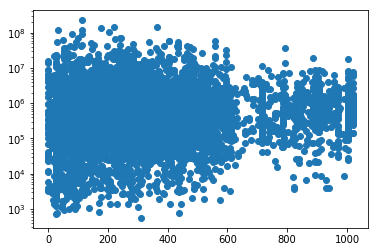

In [105]:
ax.scatter(you_ifn.top3_freq, you_ifn.views)
ax.set_yscale('log')

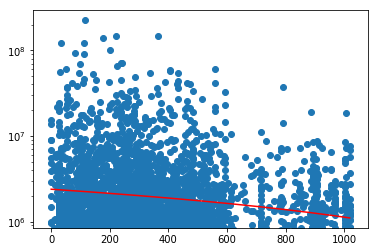

In [113]:
#LEMBRANDO
x = you_ifn.top3_freq
y = you_ifn.views

#beta^0 e beta^1
yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.gca().set_yscale('log')


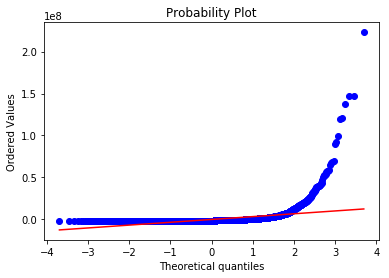

In [101]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt);


### ANÁLISE DESCRITIVA

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS